# COVID-19 bar chart race 

The COVID-19 pandemic is a coronavirus disease that was first identified in Wuhan, China in Decembre 2019. The World Health Organization declared the outbreak a Public Health Emergency of International Concern on 30th January 2020, and a pandemic on 11th March 2020. Daily level information on the affected people worldwide is easily available online and aesthetic visualization can help having a better insight of the evolution of the pandemic.

We will create a bar chart race with the total COVID-19 deaths per million people per country to see the evolution of the pandemic. We have chosen to plot the total deaths per million because we consider this variable to be more appriopriate than the commonly used number of confirmed cases which is influenced by the testing policy of each country.

## Importing the Python libraries

We import the different libraries that will be useful for the analyses:

In [1]:
import numpy as np # mathematical operations
import pandas as pd # working with data frames
import matplotlib.pyplot as plt # for the bar chart
import matplotlib.ticker as ticker # formatting
import matplotlib.animation as animation # animation (race)
from IPython.display import HTML # displaying animation
from datetime import datetime # manipulating dates

%matplotlib inline

## Reading, cleaning the COVID-19 file and selecting appropriate data

### Reading the data

The data set used in this project can be found here: https://ourworldindata.org/coronavirus (open-source). It is regularly updated. It contains information about the confirmed cases of coronavirus and the deaths in different countries. 

In [2]:
df_raw = pd.read_csv('owid-covid-data.csv',sep=',') # reading the csv raw file

In [243]:
print(len(df_raw)) # length of the file
df_raw.info() # information about the file

13675
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13675 entries, 0 to 13674
Data columns (total 16 columns):
iso_code                    13492 non-null object
location                    13675 non-null object
date                        13675 non-null object
total_cases                 13675 non-null int64
new_cases                   13675 non-null int64
total_deaths                13675 non-null int64
new_deaths                  13675 non-null int64
total_cases_per_million     13394 non-null float64
new_cases_per_million       13394 non-null float64
total_deaths_per_million    13395 non-null float64
new_deaths_per_million      13395 non-null float64
total_tests                 3259 non-null float64
new_tests                   2907 non-null float64
total_tests_per_thousand    3259 non-null float64
new_tests_per_thousand      2916 non-null float64
tests_units                 3259 non-null object
dtypes: float64(8), int64(4), object(4)
memory usage: 1.7+ MB


This is what the data set looks like (we display the 5 first rows):

In [244]:
df_raw.head(n=5)

iso_code location        date  total_cases  new_cases  total_deaths  \
0      ABW    Aruba  2020-03-13            2          2             0   
1      ABW    Aruba  2020-03-20            4          2             0   
2      ABW    Aruba  2020-03-24           12          8             0   
3      ABW    Aruba  2020-03-25           17          5             0   
4      ABW    Aruba  2020-03-26           19          2             0   

   new_deaths  total_cases_per_million  new_cases_per_million  \
0           0                   18.733                 18.733   
1           0                   37.465                 18.733   
2           0                  112.395                 74.930   
3           0                  159.227                 46.831   
4           0                  177.959                 18.733   

   total_deaths_per_million  new_deaths_per_million  total_tests  new_tests  \
0                       0.0                     0.0          NaN        NaN   
1                       0.0                     0.0          NaN        NaN   
2                       0.0                     0.0          NaN        NaN   
3                       0.0                     0.0          NaN        NaN   
4                       0.0                     0.0          NaN        NaN   

   total_tests_per_thousand  new_tests_per_thousand tests_units  
0                       NaN                     NaN         NaN  
1                       NaN                     NaN         NaN  
2                       NaN                     NaN         NaN  
3                       NaN                     NaN         NaN  
4                       NaN                     NaN         NaN

### Cleaning and selecting appropriate data

We select only the useful variables four our analyses: location, date, total_deaths_per_million:

In [245]:
df = df_raw[['location','date','total_deaths_per_million']]
df.head(5)

location        date  total_deaths_per_million
0    Aruba  2020-03-13                       0.0
1    Aruba  2020-03-20                       0.0
2    Aruba  2020-03-24                       0.0
3    Aruba  2020-03-25                       0.0
4    Aruba  2020-03-26                       0.0

We delete the 'World' and 'International' rows (we keep only the rows for each country, but not for the entire world):

In [246]:
df = df[(df['location'] != 'World') & (df['location'] != 'International')]
len(df)

13492

We delete minor islands and minor states that are not statistically important:

In [247]:
df2 = df[(df['location'] != 'San Marino') & (df['location'] != 'Andorra') & (df['location'] != 'Antigua and Barbuda') & (df['location'] != 'Aruba') & (df['location'] != 'Bahrain') & (df['location'] != 'Barbados') & (df['location'] != 'Bermuda') & (df['location'] != 'Bonaire Sint Eustatius and Saba') & (df['location'] != 'British Virgin Islands') & (df['location'] != 'Cayman Islands') & (df['location'] != 'Faeroe Islands') & (df['location'] != 'Gibraltar') & (df['location'] != 'Guam') & (df['location'] != 'Gurnsey') & (df['location'] != 'Isle of Man') & (df['location'] != 'Jersey') & (df['location'] != 'Monaco') & (df['location'] != 'Montserrat') & (df['location'] != 'Northern Mariana Islands') & (df['location'] != 'Saint Kitts and Nevis') & (df['location'] != 'San Marino') & (df['location'] != 'Sao Tona and Principe') & (df['location'] != 'Sint Maarten (Dutch part)') & (df['location'] != 'Trinidad and Tobago') & (df['location'] != 'Turks and Caicos Islands') & (df['location'] != 'United States Virgin Islands') & (df['location'] != 'Vatican')]
print(len(df2))

12368


We check if there are missing data and we delete them:

In [3]:
print('There are', df2.isna().sum()[2], 'missing values') # detecting missing values (df.isna().sum() : see the count of nulls in every column)
df3 = df2.dropna() # removing the missing values
print('Length of the df file is:', len(df2)) # length of the file
print('Length of the df file without missing data is:', len(df3)) # length of the file without missing values

NameError: name 'df2' is not defined

We check the descriptive statistics to see if there are any abnormal data: 

In [249]:
df3.describe() # descriptive statistics for the total deaths per million

total_deaths_per_million
count              12191.000000
mean                   6.853368
std                   36.440879
min                    0.000000
25%                    0.000000
50%                    0.000000
75%                    0.804500
max                  612.100000

## Drawing the bar chart

In [250]:
df3.set_index('location')

date  total_deaths_per_million
location                                         
Afghanistan  2019-12-31                     0.000
Afghanistan  2020-01-01                     0.000
Afghanistan  2020-01-02                     0.000
Afghanistan  2020-01-03                     0.000
Afghanistan  2020-01-04                     0.000
...                 ...                       ...
Zimbabwe     2020-04-23                     0.202
Zimbabwe     2020-04-24                     0.202
Zimbabwe     2020-04-25                     0.269
Zimbabwe     2020-04-26                     0.269
Zimbabwe     2020-04-27                     0.269

[12191 rows x 2 columns]

Transform the dates into continuous numbers (proleptic Gregorian ordinal):

In [251]:
df3=df3.copy()
df3['date2'] = pd.to_datetime(df3['date'])
df3['date2']

df3['date2'] = df3['date2'].apply(lambda x: x.toordinal())

df3.head()

location        date  total_deaths_per_million   date2
36  Afghanistan  2019-12-31                       0.0  737424
37  Afghanistan  2020-01-01                       0.0  737425
38  Afghanistan  2020-01-02                       0.0  737426
39  Afghanistan  2020-01-03                       0.0  737427
40  Afghanistan  2020-01-04                       0.0  737428

Create the function with the bar chart:

C:\Users\PAD\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


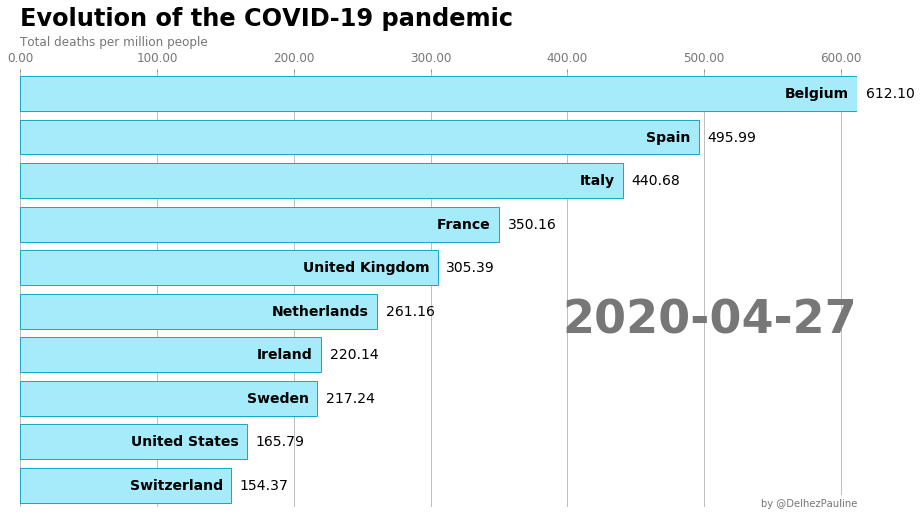

In [260]:
mini=df3['date2'].min() # first date
maxi=df3['date2'].max() # last date

fig, ax = plt.subplots(figsize=(15, 8))

def draw_barchart(current_date):
    dff = df3[df3['date2'].eq(current_date)].sort_values(by='total_deaths_per_million', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['location'], dff['total_deaths_per_million'], color='#A5EBF9', edgecolor='#18A9C6')
    dx = dff['total_deaths_per_million'].max() / 100
    for i, (total_deaths_per_million, location) in enumerate(zip(dff['total_deaths_per_million'], dff['location'])):
        ax.text(total_deaths_per_million-dx, i,     location,           size=14, weight=600, ha='right', va='center')
        ax.text(total_deaths_per_million+dx, i,     f'{total_deaths_per_million:,.2f}',  size=14, ha='left',  va='center')
    jour=dff.get_value(0,1,takeable = True) #get the date 
    ax.text(1, 0.4, jour, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Total deaths per million people', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.15, 'Evolution of the COVID-19 pandemic',
            transform=ax.transAxes, size=24, weight=600, ha='left', va='top')
    ax.text(1, 0, 'by @DelhezPauline', transform=ax.transAxes, color='#777777', ha='right',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
draw_barchart(maxi)

## Animating the bar chart

To animate the bar chart, we will use FuncAnimation from matplotlib.animation.

FuncAnimation makes an animation by repeatedly calling a function. In our case, it'll be draw_barchart.

'frames' arguments accepts what values you want to run draw_barchart (from first (mini) to last (maxi) date). We will start from 20th January (mini+20), because there are very few data about deaths before this date.

C:\Users\PAD\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


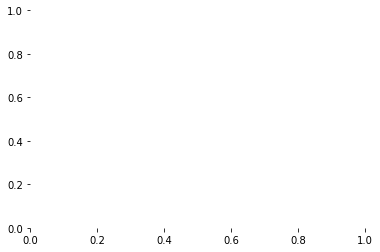

In [261]:
fig, ax = plt.subplots(figsize=(15, 8))
plt.close()
animator = animation.FuncAnimation(fig=fig, func=draw_barchart, frames=range(mini+20,maxi+1),interval=300)
HTML(animator.to_jshtml())

Save the animation as a GIF:

MovieWriter PaulineDelhez unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.
C:\Users\PAD\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


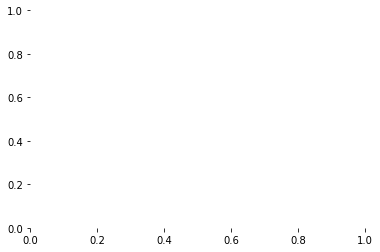

In [272]:
animator.save('myAnimation.gif', writer='PaulineDelhez', fps=2) # save the animation as a GIF (fps=2 frame per second)